# INTRODUZIONE

## Scopo dell'analisi

Il dataset è stato creato in un progetto che mira a contribuire alla riduzione dell'abbandono e del fallimento accademico nell'istruzione superiore, utilizzando tecniche di machine learning per identificare gli studenti a rischio in una fase precoce del loro percorso accademico, in modo che possano essere messe in atto strategie di supporto.

Il dataset include informazioni note al momento dell'iscrizione dello studente: percorso accademico, dati demografici e fattori socio-economici.

# Fonte

UC Irvine Machine Learning Repository - Predict Students' Dropout and Academic Success (Donated on 12/12/2021)

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

# Riconoscimenti

M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

## Licenza

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

# Importazione di pacchetti e librerie

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import regex as re # Pattern matching

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report, make_scorer, RocCurveDisplay, silhouette_score, adjusted_rand_score, f1_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN


In [ ]:
sns.set_theme(palette="tab10")

# Data Ingestion

In [ ]:
try:

  # Importa dataset, salvati come CSV
  X = pd.read_csv("feature.csv")
  y = pd.read_csv("target.csv")
  variables = pd.read_csv("variables.csv")

except: # Se i file non sono presenti

  # Installa pacchetto necessario per interagire con API di UC Irvine
  !pip install ucimlrepo
  from ucimlrepo import fetch_ucirepo

  # Scarica repository da UC Irvine
  predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

  # Estrae dati da repository
  X = predict_students_dropout_and_academic_success.data.features
  y = predict_students_dropout_and_academic_success.data.targets
  variables = predict_students_dropout_and_academic_success.variables

  # Salva dataset come CSV
  X.to_csv("feature.csv", index=False)
  y.to_csv("target.csv", index=False)
  variables.to_csv("variables.csv", index=False)

# Exploratory analysis

## Feature df

In [ ]:
# Mostra df delle feature
X

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
# Mostra informazioni relative a df delle feature
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Analisi descrittiva
X.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Target df

In [ ]:
# Mostra df della variabile target
y

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [ ]:
# Mostra informazioni relative alla variabile target
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


In [ ]:
y.value_counts(normalize = True)

Target  
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

In [ ]:
y.describe()

,Target
count,4424
unique,3
top,Graduate
freq,2209


In [ ]:
# L'obbiettivo dell'analisi è individuare tutti gli studenti che possono incontrare difficoltà nel loro percorso accademico - indipendentemente se lasciano il percorso o superano la durata normale.
# Di conseguenza, possiamo ricodificare "Enrolled" e "Dropout" come "Not graduate"
pos_label = "Not graduate"

y = y.where(y == "Graduate", pos_label)

y.value_counts(normalize = True)

Target      
Not graduate    0.500678
Graduate        0.499322
Name: proportion, dtype: float64

## Variables df

In [ ]:
# Inforamzioni relative alle varaibili
variables

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


# Data cleaning

##Decoding encoded columns

Some columns are encoded, so they need to be decoded to be analysed more easily.

In the "variables" tables we have the code-value pairs, so we can automate this process.

In [ ]:
# COlonna delle colonne da decodificare
colms_to_decode = [
    "Marital Status",
    "Application mode",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Mother's qualification",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

In [ ]:
def get_column_encoding(column_name: str, variables=variables):
  """
  get_column_encoding(column_name: str, variables=variables)
    Return a dictionary with key-value pairs corresponding to the encoding of the given column

    Parameters
    column_name: str
      Name of the column to extract encoding from
    variables: pd.DataFrame
      DataFrame containing the columns encoding

    Returns
    Dictionary
      Code-decode pairs
  """
  # Estrae descrizione dal df variables
  description = variables.loc[variables["name"] == column_name, "description"].values[0]

  # Trova tutti i match al patter che caratterizza il codice
  pattern = re.compile("\d+ (–|-) ")
  matches = [m.span() for m in re.finditer(pattern, description)]


  # Dizionario avente come keys i codici e values le relative decodifiche
  encoding = {}

  i = 0
  while i < len(matches)-1:

    # Estrae codice sotto forma di integet
    start = matches[i][0]     # Indice dell'inzio dell'attuale match
    end =   matches[i][1]-3   # Indice della fine dell'attuale match meno 3 (Rimuove " - ")
    code = int(description[start:end])

    # Get decode
    start = matches[i][1]      # Indice della fine dell'attuale match
    end =   matches[i+1][0]-1  # Indice dell'inizio del match successivo meno 1
    decode = description[start:end]

    # Salva coppia codice-decodifica
    encoding[code] = decode

    i += 1

  else: # Per evitare out of bound error, l'ultimo match è trattato in modo diverso
    code = int(description[matches[i][0]:matches[i][1]-3]) # Stessa cosa del caso normale
    decode = description[matches[i][1]:] # Essendo che non si può usare come riferimento il match successivo, si usa la fine della stringa

    # Salva coppia codice-decodifica
    encoding[code] = decode

  return encoding

In [ ]:
# Estrazione della decodifica
cols_decode = {}

for col in colms_to_decode:

  cols_decode[col] = get_column_encoding(col)

In [ ]:
# Decodificazione delle colonne
for column in cols_decode.keys():
  map = cols_decode[column]
  X.loc[:, column] = X.loc[:,column].map(map)

##Rimozione ";" dalla colonna "Nacinality"

In [ ]:
X.loc[ : ,"Nacionality"] = X.loc[:, "Nacionality"].str.replace(";", "")

##Rimozione colonne ridondanti

In [ ]:
X[["International", "Nacionality"]].value_counts()

International  Nacionality          
no             Portuguese               4314
yes            Brazilian                  38
               Santomean                  14
               Cape Verdean               13
               Spanish                    13
               Guinean                     5
               Moldova (Republic of)       3
               Italian                     3
               Ukrainian                   3
               German                      2
               Angolan                     2
               Mexican                     2
               Mozambican                  2
               Romanian                    2
               Russian                     2
               English                     1
               Lithuanian                  1
               Dutch                       1
               Cuban                       1
               Colombian                   1
               Turkish                     1
Name: count, dtype

In [ ]:
# Rimozione colonna "International" -> La stessa informazione è già espressa in maniera più accurata da colonna "Nacionality"
X = X.drop(columns="International")

##Riduzione caridnalità



In [ ]:
# Verifica della frequenza dei valori che può assumere ogni colonna
for column in X.select_dtypes("object").columns:
  print(X[column].value_counts())
  print("\n\n\n================================")

Marital Status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64



Application mode
1st phase - general contingent                         1708
2nd phase - general contingent                          872
Over 23 years old                                       785
Change of course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase - general contingent                          124
Transfer                                                 77
Change of institution/course                             59
1st phase - special contingent (Madeira Island)          38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st phase - special contingent (Azores Island)           16
Ord

In [ ]:
# Creazione di una mappa che definisca con cquali valori rimpiazzare i pre-esistenti

partents_qualification = {
        # No education
        "Can read without having a 4th year of schooling": "Can't read or write",

        # Basic education
        "7th Year (Old)": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        "7th year of schooling": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        "8th year of schooling": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        "9th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        "10th Year of Schooling": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        "11th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        "Other - 11th Year of Schooling": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        "11th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",

        # High school
        "12th Year of Schooling - Not Completed": "Secondary Education - 12th Year of Schooling or Eq.",
        "2nd cycle of the general high school course": "Secondary Education - 12th Year of Schooling or Eq.",
        "Frequency of Higher Education": "Secondary Education - 12th Year of Schooling or Eq.",

        # Higher education
        "Higher education - degree (1st cycle)": "Higher Education - bachelor",
        "Higher Education - Bachelor's Degree": "Higher Education - bachelor",
        "Higher Education - Master's": "Higher Education - master",
        "Higher Education - Master (2nd cycle)": "Higher Education - master",
        "Higher Education - Doctorate": "Higher Education - doctorate",
        "Higher Education - Doctorate (3rd cycle)": "Higher Education - doctorate",

        # Spacialization
        "Specialized higher studies course": "Technological specialization course",
        "Professional higher technical course": "Technological specialization course",
        "Technical-professional course": "Technological specialization course",
        "General commerce course": "Technological specialization course",
}

parents_occupation = {
        '(blank)': "Unknown_Unknown",
        'Administrative staff': "Medium_Management",
        'Armed Forces Officers': "Medium_Armed force",
        'Armed Forces Professions': "Low_Armed force",
        'Armed Forces Sergeants': "High_Armded force",
        'Data, accounting, statistical, financial services and registry-related operators': "High_STEM",
        'Directors of administrative and commercial services': "High_Managment",
        'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry': "High_Agricolture",
        'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence': "Low_Agticolture",
        'Fixed plant and machine operators': "Low_Industrial",
        'Health professionals': "High_Health",
        'Hotel, catering, trade and other services directors': "High_Service",
        'Information and communication technology technicians': "Medium_ICT",
        'Installation and Machine Operators and Assembly Workers': "Medium_Industrial",
        'Intermediate Level Technicians and Professions': "Medium_ICT",
        'Intermediate level science and engineering technicians and professions': "Medium_STEM",
        'Intermediate level technicians from legal, social, sports, cultural and similar services': "Medium_Legal",
        'Market-oriented farmers and skilled agricultural and animal production workers': "Medium_Agricultural",
        'Meal preparation assistants': "Low_Food",
        'Office workers, secretaries in general and data processing operators': "Low_Management",
        'Other Armed Forces personnel': "Low_Armed Force",
        'Other Situation': "Unknown_Unknown",
        'Other administrative support staff': "Low_Management",
        'Personal Services, Security and Safety Workers and Sellers': "Medium_Service",
        'Personal care workers and the like': "Medium_Service",
        'Protection and security services personnel': "Medium_Service",
        'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers': "Medium_Management",
        'Skilled Workers in Industry, Construction and Craftsmen': "Medium_Industrial",
        'Skilled construction workers and the like, except electricians': "Medium_Construction",
        'Skilled workers in electricity and electronics': "Medium_Construction",
        'Skilled workers in metallurgy, metalworking and similar': "Medium_Industrial",
        'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like': "High_Industrial",
        'Specialists in Intellectual and Scientific Activities': "High_Data",
        'Specialists in finance, accounting, administrative organization, public and commercial relations': "High_Data",
        'Specialists in information and communication technologies (ICT)': "High_ICT",
        'Specialists in the physical sciences, mathematics, engineering and related techniques': "High_STEM",
        'Street vendors (except food) and street service providers': "Low_Service",
        'Student': "Unknown_Unknown",
        'Technicians and professionals, of intermediate level of health': "Medium_Health",
        'Unskilled Workers': "Low_General",
        'Unskilled workers in agriculture, animal production, fisheries and forestry': "Low_Agricolture",
        'Unskilled workers in extractive industry, construction, manufacturing and transport': "Low_Industrial",
        'Vehicle drivers and mobile equipment operators': "Medium_Service",
        'Workers in food processing, woodworking, clothing and other industries and crafts': "Low_Food",
        'assembly workers': "Low_Industrial",
        'cleaning workers': "Low_Service",
        'personal service workers': "Low_Service",
        'sellers': "Medium_Service",
        'teachers': "High_Service"
}

cardinality_reducer = {
    "Application mode": {

        # General contingent
        "1st phase - general contingent": "General contingent",
        "2nd phase - general contingent": "General contingent",
        "3rd phase - general contingent": "General contingent",

        # Change of course
        "Change of course": "Change of institution/course",
        "Change of institution/course (International)": "Change of institution/course", # International status is already expressed in the "Nacionatlity" column

        # Special contingent
        "1st phase - special contingent (Madeira Island)": "Special contingent", # TO DO: check special contingent
        "1st phase - special contingent (Azores Island)": "Special contingent", # TO DO: check special contingent

        # Ordinance
        "Ordinance No. 854-B/99": "Ordinance", # TO DO: Check ordinance
        "Ordinance No. 533-A/99, item b2) (Different Plan)": "Ordinance", # TO DO: Check ordinance
        "Ordinance No. 533-A/99, item b3 (Other Institution)": "Ordinance", # TO DO: Check ordinance
        "Ordinance No. 612/93": "Ordinance", # TO DO: Check ordinance

    },
    "Previous qualification": {

        # Basic education
        "10th year of schooling - not completed": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        "10th year of schooling": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        "11th year of schooling": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        "11th year of schooling - not completed": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        "Other - 11th year of schooling": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        "12th year of schooling - not completed": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",

        # Higher education
        "Higher education - degree": "Higher education - bachelor",
        "Higher education - degree (1st cycle)": "Higher education - bachelor",
        "Higher education - bachelor's degree": "Higher education - bachelor",
        "Higher education - master (2nd cycle)": "Higher education - master",
        "Higher education - master's": "Higher education - master",

        # Specialisation course
        "Technological specialization course": "Specialisation course",
        "Professional higher technical course": "Specialisation course"
    },
    "Nacionality": {
        # America
        "Brazilian": "America",
        "Mexican": "America",
        "Colombian": "America",
        "Cuban": "America",

        # Africa
        "Santomean": "Africa",
        "Guinean": "Africa",
        "Mozambican": "Africa",
        "Angolan": "Africa",
        "Cape Verdean": "Africa",

        # Europe
        "Spanish": "Europe",
        "Italian": "Europe",
        "Ukrainian": "Europe",
        "Moldova (Republic of)": "Europe",
        "German": "Europe",
        "Romanian": "Europe",
        "Dutch": "Europe",
        "English": "Europe",
        "Lithuanian": "Europe",
        "Turkish": "Europe",
    },
    "Course": {

       # Design and Communication
       "Animation and Multimedia Design": "Design and Communication",
       "Tourism": "Design and Communication",
       "Communication Design": "Design and Communication",
       "Journalism and Communication": "Design and Communication",
       "Advertising and Marketing Management": "Design and Communication",

       # Social care
       "Social Service (evening attendance)": "Health science",
       "Nursing": "Health science",
       "Social Service": "Health science",
       "Oral Hygiene": "Health science",

       # Management
       "Management (evening attendance)": "Management",
       "Management": "Management",

       # Plant and animal science
       "Agronomy": "Plant and animal science",
       "Veterinary Nursing": "Plant and animal science",
       "Equinculture": "Plant and animal science",

       # STEM
       "Biofuel Production Technologies": "STEM",
       "Informatics Engineering": "STEM",

       # Basic education
       "Basic Education": "Basic Education",
    },
    "Mother's qualification": partents_qualification,
    "Father's qualification": partents_qualification,
    "Mother's occupation": parents_occupation,
    "Father's occupation": parents_occupation
}

In [ ]:
# Rimpiazzamento dei valori
X = X.replace(cardinality_reducer)

In [ ]:
# Le colonne relative all'occupazione sono state ricodificate come "Skill Level_Settor", per ci deve essere separata in due colonne distinte: "Skill level" e "Sector"
for parent in ("Mother's", "Father's"):

  source_col = "".join(f"{parent} occupation")

  X[[parent + " Skill Level", parent + " Sector"]] = X[source_col].str.split("_", expand=True)
  X = X.drop(columns=source_col)

In [ ]:
# Verifica della frequenza dei valori che può assumere ogni colonna
for column in X.select_dtypes("object").columns:
  print(X[column].value_counts())
  print("================================\n\n\n")

Marital Status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64



Application mode
General contingent                              2704
Over 23 years old                                785
Change of institution/course                     372
Technological specialization diploma holders     213
Holders of other higher courses                  139
Transfer                                          77
Special contingent                                54
Short cycle diploma holders                       35
International student (bachelor)                  30
Ordinance                                         15
Name: count, dtype: int64



Course
Health science              1422
Design and Communication    1292
Plant and animal science     688
Management                   648
Basic Education              192
STEM                         182
Name: count, dtype:

#Data visualization

##Box plots

In [ ]:
# Seleziona colonne della tipologia "float"
num_cols = X.select_dtypes('float')

num_cols

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


In [ ]:
# Standardizza colonne selezionate
scaler = StandardScaler()

scaled_array = scaler.fit_transform(num_cols)

In [ ]:
# Trasforma np.ndarray in pd.DataFrame
scaled_df = pd.DataFrame( data = scaled_array, columns = num_cols.columns )

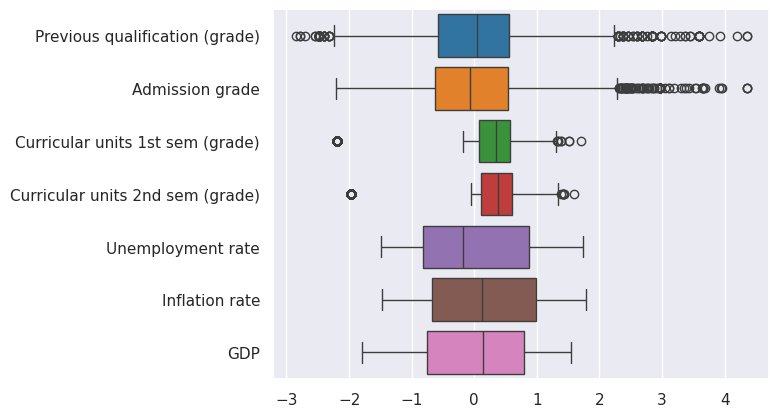

In [ ]:
# Plot boxplot
plt.figure()
sns.boxplot(data = scaled_df, orient = "h")
plt.show()

##Countplots

In [ ]:
# Seziona colonne della tipologia "Integer"
int_cols = X.select_dtypes("int").columns

int_cols

Index(['Application order', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')

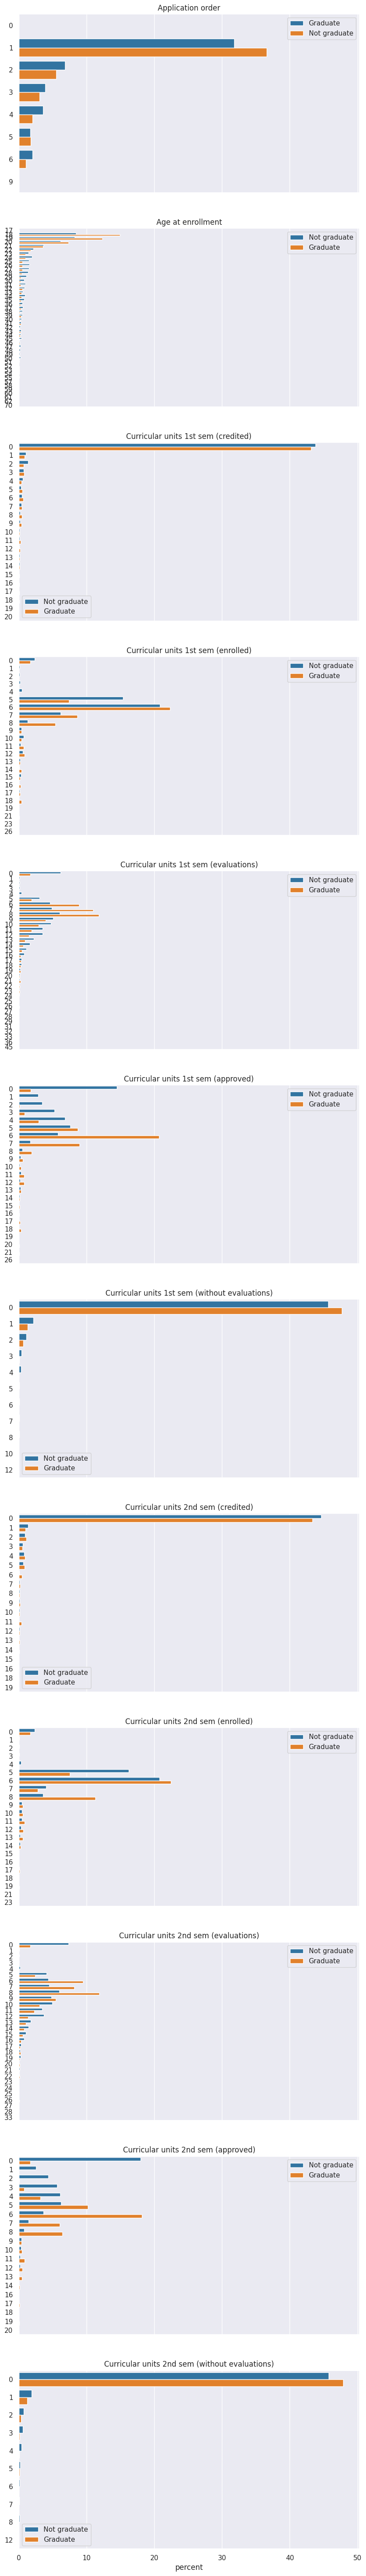

In [ ]:
# Crea figura diviso in un numero diì sotto-figure uguale al numero di colonne di tipologia "integer"
fig, axs = plt.subplots(
    nrows = len(int_cols),
    sharex = True,
    figsize=(10, 75)
)


# Per ogni colonna, crea un countplt in una sotto-figura distinta
for i, col in enumerate(int_cols):

  axs[i].set_title(col)

  sns.countplot(
      y=X[col].values,
      hue=y['Target'].values,
      stat='percent',
      ax = axs[i],
  )

#Column preprocessing

In [ ]:
# Seleziona tutte le colonne
X_cols = X.columns

# Seleziona solo le colonne categoriche
X_cat = X.select_dtypes("object")

# Seleziona solo le colonne numeriche
X_num = X.select_dtypes(exclude = "object")

In [ ]:
# Colonne categoriche da pre-processare tramite OneHotEncoder
ohe_cols = [
 'Marital Status',
 'Application mode',
 'Course',
 'Daytime/evening attendance',
 'Nacionality',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder'
]

# Colonne categoriche da preprocessare tramite OrdinalEncoder
ord_cols = [col for col in X_cols if col not in ohe_cols]

In [ ]:
# Trasformazione delle colonne
column_transformer = ColumnTransformer([
    ("ohe_encoder", OneHotEncoder(), ohe_cols),
    ("ord_encoder", OrdinalEncoder(), ord_cols)
])

X = column_transformer.fit_transform(X)

In [ ]:
X

array([[ 0.,  0.,  0., ..., 12.,  1.,  9.],
       [ 0.,  0.,  0., ...,  7.,  2., 11.],
       [ 0.,  0.,  0., ...,  5.,  1.,  9.],
       ...,
       [ 0.,  0.,  0., ...,  5.,  1.,  9.],
       [ 0.,  0.,  0., ...,  8.,  2., 14.],
       [ 0.,  0.,  0., ..., 12.,  1.,  9.]])

In [ ]:
type(X)

numpy.ndarray

#Split

In [ ]:
# Divisione del dataset in test e train
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

#Baseline Accuracy

In [ ]:
# Baseline accuracy è ottenuta associando a tutti gli elementi del test set, la moda del training set
baseline_acc = y_train.value_counts(normalize = True)

print(f"Moda: {baseline_acc.idxmax()}")
print(f"Baseline accuracy: {baseline_acc.max()}")

Moda: ('Graduate',)
Baseline accuracy: 0.5060751624752755


#Decision Tree Classifier

## Default model

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[[314 104]
 [100 367]]


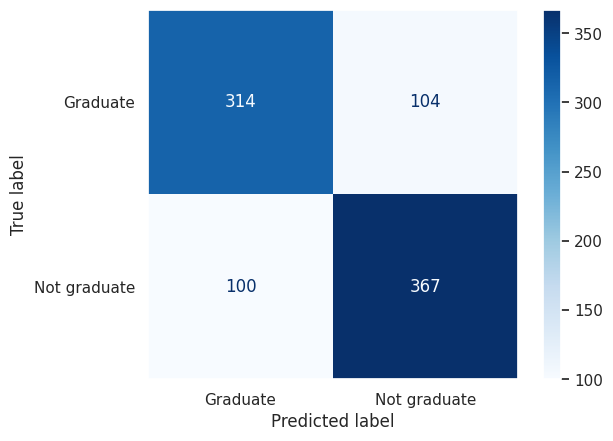

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    dtc,
    X_test,
    y_test,
    cmap = plt.cm.Blues
)

print(disp.confusion_matrix)
plt.grid(False)
plt.show()

In [ ]:
y_test_pred = dtc.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Graduate       0.76      0.75      0.75       418
Not graduate       0.78      0.79      0.78       467

    accuracy                           0.77       885
   macro avg       0.77      0.77      0.77       885
weighted avg       0.77      0.77      0.77       885



## (Hyper)Parameter Tuning

In [ ]:
dtc_params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1 ,102, 2),
    "min_samples_leaf": range(1, 26, 3),
}

In [ ]:
scorer = make_scorer(f1_score, pos_label=pos_label)

dtc_grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=42),
    param_grid = dtc_params,
    cv = 2,
    n_jobs = 1,
    scoring = scorer,
)

In [ ]:
%%time

dtc_grid_search.fit(X_train, y_train)

CPU times: user 1min 22s, sys: 333 ms, total: 1min 22s
Wall time: 1min 33s


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 102, 2),
                         'min_samples_leaf': range(1, 26, 3)},
             scoring=make_scorer(f1_score, pos_label=Not graduate))

In [ ]:
score_df = pd.DataFrame(dtc_grid_search.cv_results_)

score_df.loc[:, ["param_criterion", "param_max_depth", "param_min_samples_leaf", "mean_test_score", "std_test_score", "rank_test_score"]].sort_values(by="rank_test_score")

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
494,entropy,7,25,0.808466,0.010593,1
917,entropy,101,25,0.807804,0.009197,2
773,entropy,69,25,0.807804,0.009197,2
602,entropy,31,25,0.807804,0.009197,2
530,entropy,15,25,0.807804,0.009197,2
...,...,...,...,...,...,...
693,entropy,53,1,0.768868,0.003729,877
864,entropy,91,1,0.768868,0.003729,877
720,entropy,59,1,0.768868,0.003729,877
837,entropy,85,1,0.768868,0.003729,877


##Best model

In [ ]:
dtc_best = dtc_grid_search.best_estimator_
dtc_best.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 25,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

[[357  61]
 [ 97 370]]


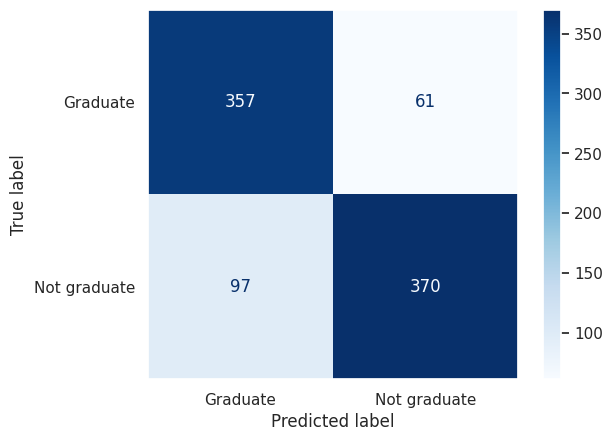

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    dtc_best,
    X_test,
    y_test,
    cmap = plt.cm.Blues
)

print(disp.confusion_matrix)
plt.grid(False)
plt.show()

In [ ]:
y_test_pred = dtc_best.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Graduate       0.79      0.85      0.82       418
Not graduate       0.86      0.79      0.82       467

    accuracy                           0.82       885
   macro avg       0.82      0.82      0.82       885
weighted avg       0.82      0.82      0.82       885



#Random Forest Classifier

##Default model

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred = rfc.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Graduate       0.79      0.89      0.84       418
Not graduate       0.89      0.79      0.84       467

    accuracy                           0.84       885
   macro avg       0.84      0.84      0.84       885
weighted avg       0.84      0.84      0.84       885



In [ ]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

##(Hyper)Parameters tuning

In [ ]:
rfc_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8],
    'n_estimators': [80, 90, 100, 110, 125],
}

In [ ]:
rfc_grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state=42),
    param_grid = rfc_params,
    cv = 5,
    n_jobs = 1,
    scoring = scorer
)

In [ ]:
%%time

rfc_grid_search.fit(X_train, y_train.values.ravel())

CPU times: user 10min 55s, sys: 2.05 s, total: 10min 57s
Wall time: 11min 4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'n_estimators': [80, 90, 100, 110, 125]},
             scoring=make_scorer(f1_score, pos_label=Not graduate))

In [ ]:
score_df = pd.DataFrame(rfc_grid_search.cv_results_)

score_df.sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
205,0.418311,0.007988,0.021517,0.002587,log_loss,20,2,80,"{'criterion': 'log_loss', 'max_depth': 20, 'mi...",0.851252,0.852174,0.822485,0.850812,0.857143,0.846773,0.012353,1
125,0.417215,0.005189,0.021405,0.002028,entropy,20,2,80,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.851252,0.852174,0.822485,0.850812,0.857143,0.846773,0.012353,1
166,0.469986,0.006342,0.023894,0.002591,log_loss,None,2,90,"{'criterion': 'log_loss', 'max_depth': None, '...",0.844118,0.850073,0.828614,0.849478,0.860947,0.846646,0.010543,3
86,0.478643,0.006601,0.022880,0.001411,entropy,None,2,90,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.844118,0.850073,0.828614,0.849478,0.860947,0.846646,0.010543,3
146,0.466994,0.003891,0.022668,0.000735,entropy,30,2,90,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.844118,0.850073,0.828614,0.849478,0.860947,0.846646,0.010543,3


##Best model

In [ ]:
rfc_best = rfc_grid_search.best_estimator_
rfc_best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

[[361  57]
 [ 93 374]]


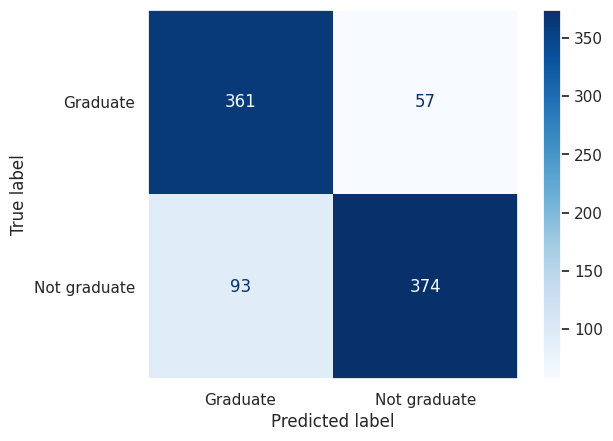

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    rfc_best,
    X_test,
    y_test,
    cmap = plt.cm.Blues
)

print(disp.confusion_matrix)
plt.grid(False)
plt.show()

In [ ]:
y_test_pred = rfc_best.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Graduate       0.80      0.86      0.83       418
Not graduate       0.87      0.80      0.83       467

    accuracy                           0.83       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.83      0.83      0.83       885



##Feature importance

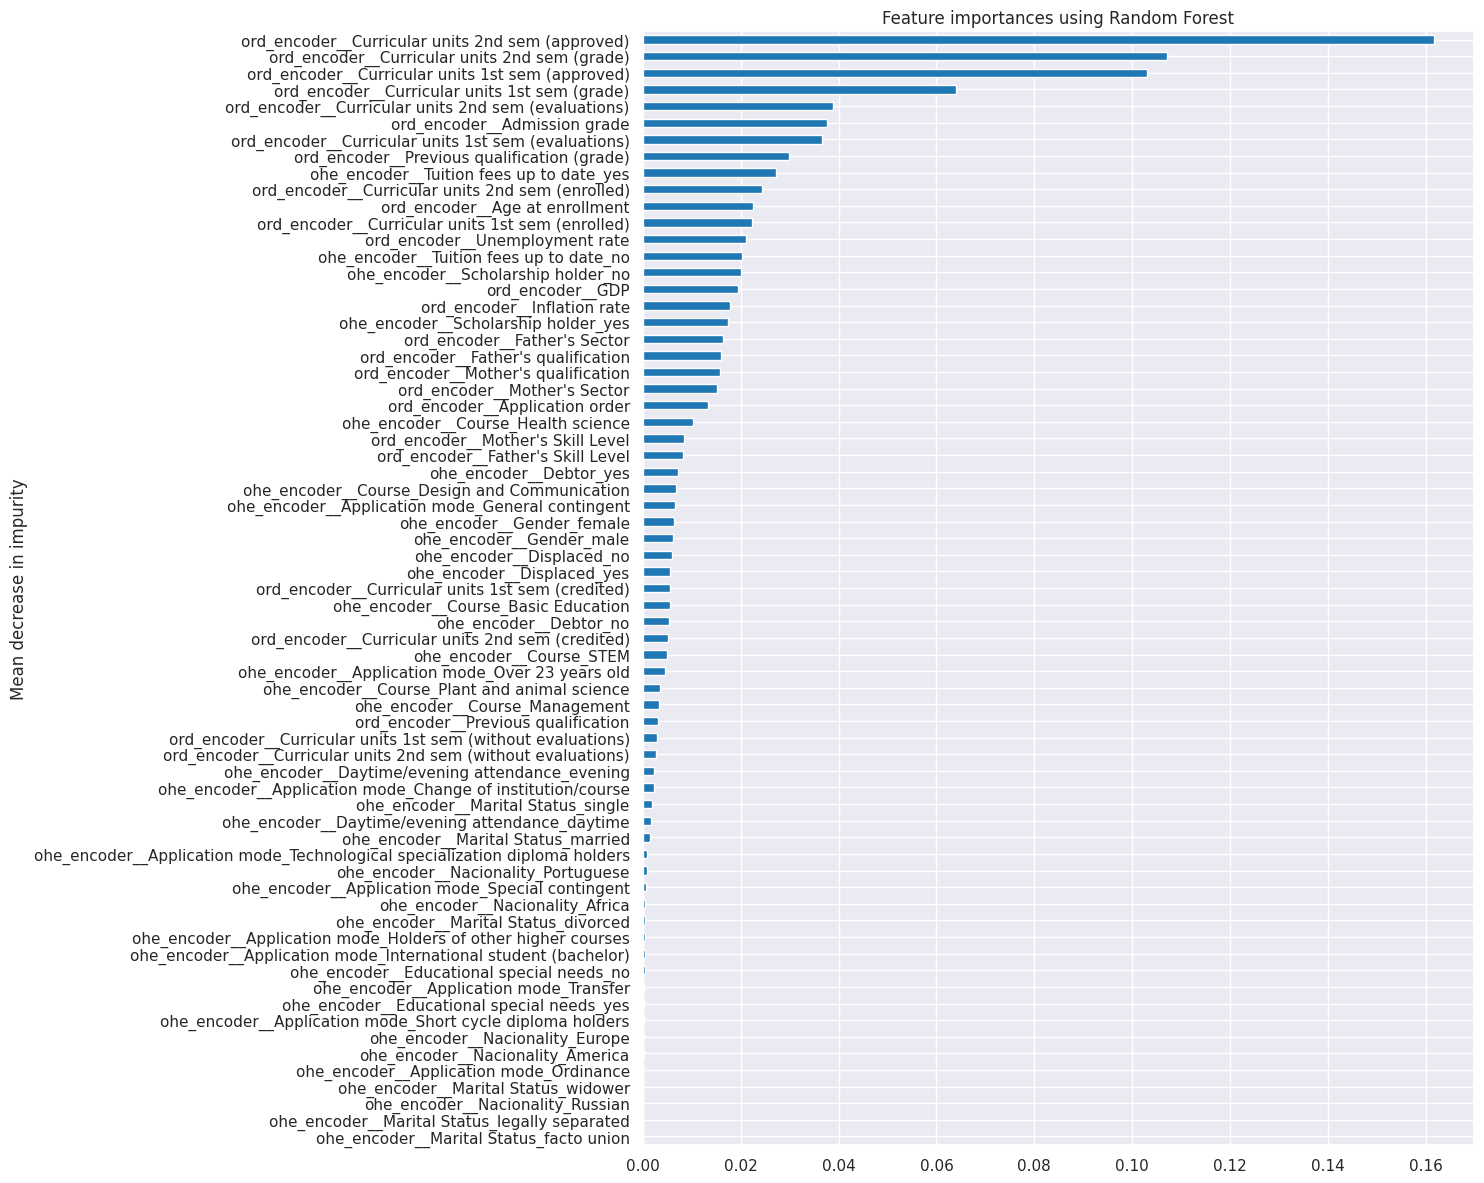

In [ ]:
forest_importances = pd.Series(rfc_best.feature_importances_, index = column_transformer.get_feature_names_out())

fig, ax = plt.subplots(figsize = (15, 12))
forest_importances.sort_values().plot.barh(ax=ax)
ax.set_title("Feature importances using Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#Support Vector Classifier

In [ ]:
# Scaling perché SVC usa la distanza tra punti e le feature con scale diverse possono distorcere le distanze
# La funzione RBF all'interno del kernel mi darabbe errore
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Analisi delle componenti principali perché le variabili sono troppe e SVC mi dà errore
pca = PCA(n_components=0.95)  # Riporta le componenti rappresentati il 95% della varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


####Default model

In [ ]:
# Creazione e addestramento del modello SVM di base
svm = SVC(random_state=42)
svm.fit(X_train_pca, y_train.values.ravel())



SVC(random_state=42)

In [ ]:
y_test_pred = svm.predict(X_test_pca)
print("Risultati")
print(classification_report(y_test, y_test_pred))

Risultati
              precision    recall  f1-score   support

    Graduate       0.78      0.87      0.82       418
Not graduate       0.87      0.78      0.82       467

    accuracy                           0.82       885
   macro avg       0.82      0.82      0.82       885
weighted avg       0.82      0.82      0.82       885



In [ ]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

####(Hyper)Parameters tuning

In [ ]:
# Definizione dei parametri per la ricerca randomizzata
svm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto',  0.0001, 0.001, 0.1, 1]
}

In [ ]:
# Creazione dell'oggetto RandomizedSearchCV
svm_random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=svm_params,
    n_iter=25,
    cv=3,
    n_jobs=-1,
    scoring=scorer,
    )

In [ ]:
%%time
svm_random_search.fit(X_train_pca, y_train.values.ravel())

CPU times: user 1.25 s, sys: 175 ms, total: 1.42 s
Wall time: 43.5 s


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=25, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'gamma': ['scale', 'auto', 0.0001,
                                                  0.001, 0.1, 1],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   scoring=make_scorer(f1_score, pos_label=Not graduate))

In [ ]:
score_df = pd.DataFrame(svm_random_search.cv_results_)
print("Risultati")
print(score_df.sort_values(by="rank_test_score").head())

Risultati
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
19       0.422517      0.021681         0.176340        0.007676      sigmoid   
10       0.686552      0.012886         0.301872        0.004236      sigmoid   
5        0.589382      0.073787         0.410902        0.006559          rbf   
6        0.543774      0.007599         0.404545        0.012398          rbf   
7        0.719621      0.014952         0.327197        0.004027      sigmoid   

   param_gamma param_C                                             params  \
19       0.001      10     {'kernel': 'sigmoid', 'gamma': 0.001, 'C': 10}   
10         0.1    0.01     {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 0.01}   
5       0.0001       1         {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}   
6        0.001     0.1        {'kernel': 'rbf', 'gamma': 0.001, 'C': 0.1}   
7        scale    0.01  {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0...   

    split0_test_score  split1_test_score

####Best Model

In [ ]:
# Come per i precedenti controllo il migliore dei modelli
svm_best = svm_random_search.best_estimator_
print("Parametri")
print(svm_best.get_params())


Parametri
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Matrice
[[355  63]
 [108 359]]


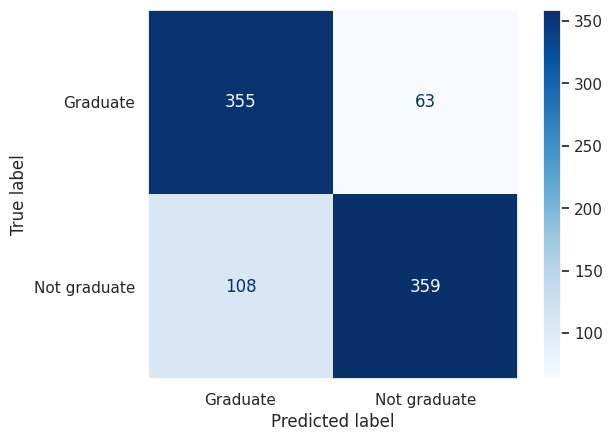

In [ ]:
# Creazione e visualizzazione della matrice di confusione
disp = ConfusionMatrixDisplay.from_estimator(
    svm_best,
    X_test_pca,
    y_test,
    cmap=plt.cm.Blues)

print("Matrice")
print(disp.confusion_matrix)
plt.grid(False)
plt.show()

In [ ]:
# Valutazione finale del modello
y_test_pred = svm_best.predict(X_test_pca)
print("Risultati_Best_Model")
print(classification_report(y_test, y_test_pred))

Risultati_Best_Model
              precision    recall  f1-score   support

    Graduate       0.77      0.85      0.81       418
Not graduate       0.85      0.77      0.81       467

    accuracy                           0.81       885
   macro avg       0.81      0.81      0.81       885
weighted avg       0.81      0.81      0.81       885



#Knn

##Default Model

In [ ]:
# Creazione e addestramento del modello KNN di base
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [ ]:
y_test_pred = knn.predict(X_test)

print("Modello di partenza:")
print(classification_report(y_test, y_test_pred))

Modello di partenza:
              precision    recall  f1-score   support

    Graduate       0.68      0.78      0.73       418
Not graduate       0.77      0.67      0.72       467

    accuracy                           0.72       885
   macro avg       0.73      0.73      0.72       885
weighted avg       0.73      0.72      0.72       885



In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##(Hyper)Parameters tuning

In [ ]:
# Parametri per il tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2, 3]
}

In [ ]:
knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    cv=5,
    n_jobs=-1,
    scoring=scorer
)


In [ ]:
%%time
knn_grid_search.fit(X_train, y_train.values.ravel())

CPU times: user 2.78 s, sys: 316 ms, total: 3.09 s
Wall time: 3min 15s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=Not graduate))

In [ ]:
score_df = pd.DataFrame(knn_grid_search.cv_results_)
print("Risultati")
print(score_df.sort_values(by="rank_test_score").head())

Risultati
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
59        0.007804      0.002070         0.619656        0.044175   
55        0.006382      0.000924         0.344768        0.010536   
115       0.006176      0.000129         0.344772        0.019255   
57        0.006651      0.001698         0.458731        0.098980   
54        0.005983      0.000210         0.412336        0.015349   

    param_metric param_n_neighbors param_p param_weights  \
59     manhattan                11       3      distance   
55     manhattan                11       1      distance   
115    minkowski                11       1      distance   
57     manhattan                11       2      distance   
54     manhattan                11       1       uniform   

                                                params  split0_test_score  \
59   {'metric': 'manhattan', 'n_neighbors': 11, 'p'...           0.758621   
55   {'metric': 'manhattan', 'n_neighbors': 11, 'p'...      

##Best Model

In [ ]:
knn_best = knn_grid_search.best_estimator_
print("Parametri Tuning")
print(knn_best.get_params())

Parametri Tuning
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}



Matrice di confusione:
[[344  74]
 [152 315]]


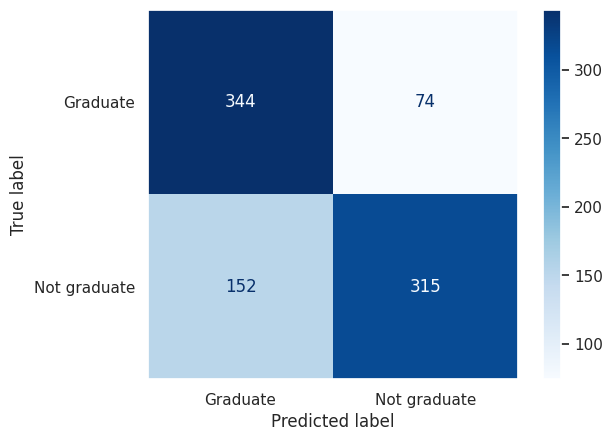

In [ ]:
# Plot Matrice di confusione
disp = ConfusionMatrixDisplay.from_estimator(
    knn_best,
    X_test,
    y_test,
    cmap=plt.cm.Blues
)
print("\nMatrice di confusione:")
print(disp.confusion_matrix)
plt.grid(False)
plt.show()


In [ ]:
# Valutazione del modello
y_test_pred = knn_best.predict(X_test)
print("\nRisultati del miglior modello:")
print(classification_report(y_test, y_test_pred))


Risultati del miglior modello:
              precision    recall  f1-score   support

    Graduate       0.69      0.82      0.75       418
Not graduate       0.81      0.67      0.74       467

    accuracy                           0.74       885
   macro avg       0.75      0.75      0.74       885
weighted avg       0.75      0.74      0.74       885



# ROC curve

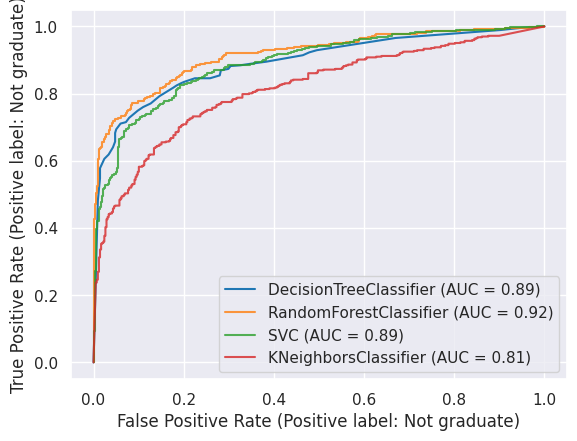

In [ ]:
plt.clf()
ax = plt.gca()

disp = RocCurveDisplay.from_estimator(dtc_best, X_test, y_test, ax=ax)
disp = RocCurveDisplay.from_estimator(rfc_best, X_test, y_test, ax=ax, alpha=0.8)
disp = RocCurveDisplay.from_estimator(svm_best, X_test_pca, y_test, ax=ax, alpha=0.8)
disp = RocCurveDisplay.from_estimator(knn_best, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# K-means

In [ ]:
# Preprocessing: standardizzazione dei dati
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Funzione per valutare il clustering

def evaluate_kmeans(kmeans, X):
    labels = kmeans.labels_
    silhouette_score = silhouette_score(X, labels)
    return silhouette_score

In [ ]:
silhouette_scores = []
inertias = []  # Per l'Elbow Method
ari_scores = [] # Per indice ARI

for clusters in range(2, 7):
    kmeans = KMeans(n_clusters=clusters, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)

    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)
    print('Silhouette:', silhouette)

    inertias.append(kmeans.inertia_)

    y = y.squeeze()

    ari = adjusted_rand_score(y, kmeans.labels_)
    ari_scores.append(ari)
    print('Ari:',ari)

Silhouette: 0.1239012819375931
Ari: 0.042486109675345426
Silhouette: 0.1191779992007721
Ari: 0.05752914237487247
Silhouette: 0.10442381161883768
Ari: 0.059301249140028545
Silhouette: 0.10313236706785892
Ari: 0.05289187075700729
Silhouette: 0.09689786030230815
Ari: 0.04104340132470897


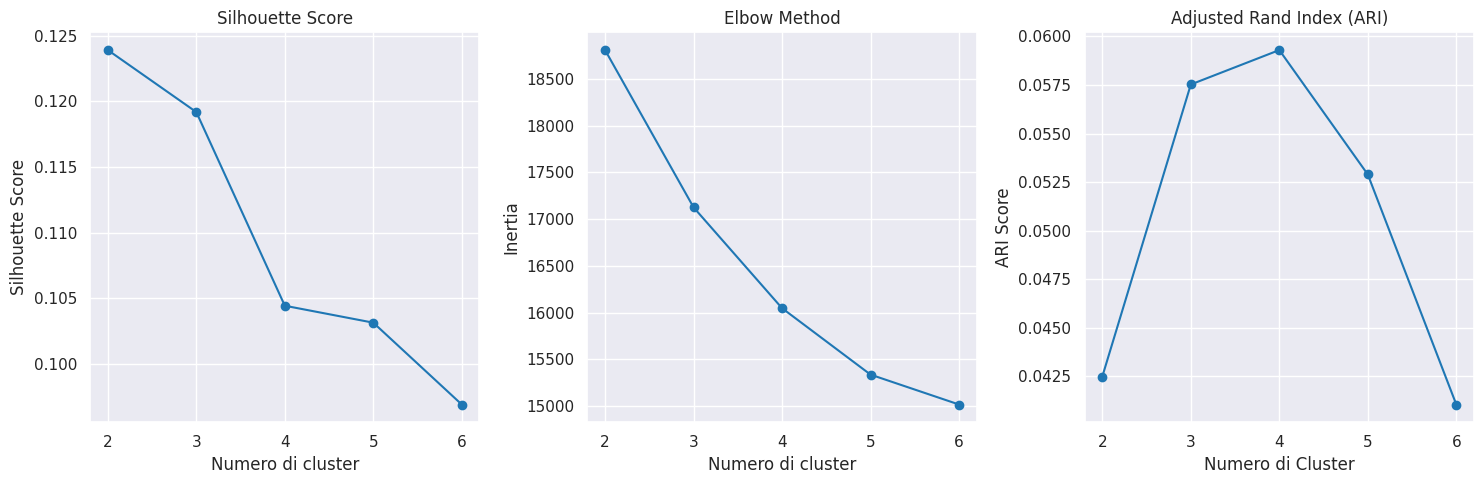

In [ ]:
plt.figure(figsize=(15, 5))
# Plot Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Numero di cluster')
plt.ylabel('Silhouette Score')

# Plot Elbow Method
plt.subplot(1, 3, 2)
plt.plot(range(2, 7), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')

# Plot per l'Adjusted Rand Index (ARI)
plt.subplot(1, 3, 3)
plt.plot(range(2, 7), ari_scores, marker='o')
plt.title('Adjusted Rand Index (ARI)')
plt.xlabel('Numero di Cluster')
plt.ylabel('ARI Score')


plt.tight_layout()
plt.show()

In [ ]:
# K-means con 2 cluster
kmeans_best = KMeans(n_clusters=4, random_state=42,n_init='auto')
kmeans_best.fit(X_scaled)


KMeans(n_clusters=4, n_init='auto', random_state=42)

In [ ]:
ari_best = adjusted_rand_score(y, kmeans_best.labels_)
print(f'ARI per 4 cluster ({kmeans_best}): {ari_best}')

ARI per 4 cluster (KMeans(n_clusters=4, n_init='auto', random_state=42)): 0.059301249140028545
